In [358]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import sklearn as sk
import numpy as np
import scipy.spatial as scisp
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import warnings 
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

In [165]:
data = pd.read_csv('train_data.csv')

In [166]:
data = data.drop("County Names",1)

In [167]:
data = data.drop("Unnamed: 0", 1)

In [168]:
data = data.drop("zip", 1)

In [170]:
data['County Fips'].unique().shape

(2926,)

In [1]:
# np.where(np.isnan(data.values))

In [172]:
new_input_data = pd.DataFrame()

In [173]:
new_input_data['fips'] = data['County Fips'].unique()

In [ ]:
% college or higher	% high school only	% 81+	% 21-30	% 31-40	% 41-50	% 51-60	% 61-70	% 71-80

In [174]:
new_input_data['Total Pop'] = np.vectorize(lambda x : data[data['County Fips'] == x]['Total Pop'].mean())(new_input_data['fips'])

In [175]:
data[data['County Fips'] == 9003]['output_labels'].mode()

0    10
dtype: int64

In [283]:
new_input_data

,fips,Total Pop,Median Income,ESTAB,% college or higher,% high school only,% 81+,% 21-30,% 31-40,% 41-50,...,Electronics and appliance stores,Food and beverage stores,Furniture and home furnishings stores,Gasoline stations,General merchandise stores,Health and personal care stores,Miscellaneous store retailers,Motor vehicle and parts dealers,Nonstore retailers,"Sporting goods, hobby, musical instrument, and book stores"
0,9003.0,897259.0,129888.000000,43.597221,0.378,0.269,0.047899,0.127288,0.120780,0.143479,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,9005.0,187530.0,65718.000000,18.675676,0.351,0.297,0.049672,0.095243,0.098678,0.155500,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,9013.0,151539.0,85427.000000,19.722221,0.412,0.275,0.033760,0.164044,0.100218,0.143567,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,9015.0,117599.0,35971.000000,12.793103,0.241,0.330,0.038096,0.133003,0.117356,0.146898,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,9011.0,274170.0,95757.000000,32.935482,0.333,0.298,0.043375,0.138100,0.113776,0.144367,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
5,9009.0,862813.0,53704.000000,55.826923,0.349,0.309,0.047509,0.135390,0.119681,0.141754,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
6,9007.0,165602.0,31151.000000,29.863636,0.415,0.261,0.049559,0.106889,0.108749,0.154183,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
7,9001.0,933835.0,52718.082031,59.637932,0.474,0.217,0.043300,0.111673,0.121873,0.155140,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
8,10003.0,546076.0,84591.000000,69.321426,0.359,0.306,0.035475,0.146150,0.126904,0.141506,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
9,42029.0,506575.0,137943.000000,38.906979,0.518,0.214,0.039092,0.115527,0.114676,0.149739,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


## Dealing with NaN values

In [176]:
new_input_data['Median Income'] = np.vectorize(lambda x : np.nanmean(data[data['County Fips'] == x]['Median Income']))(new_input_data['fips'])
new_input_data['ESTAB'] = np.vectorize(lambda x : data[data['County Fips'] == x]['ESTAB'].mean())(new_input_data['fips'])
new_input_data['% college or higher'] = np.vectorize(lambda x : data[data['County Fips'] == x]['% college or higher'].mean())(new_input_data['fips'])
new_input_data['% high school only'] = np.vectorize(lambda x : data[data['County Fips'] == x]['% high school only'].mean())(new_input_data['fips'])
new_input_data['% 81+'] = np.vectorize(lambda x : data[data['County Fips'] == x]['% 81+'].mean())(new_input_data['fips'])
new_input_data['% 21-30'] = np.vectorize(lambda x : data[data['County Fips'] == x]['% 21-30'].mean())(new_input_data['fips'])
new_input_data['% 31-40'] = np.vectorize(lambda x : data[data['County Fips'] == x]['% 31-40'].mean())(new_input_data['fips'])
new_input_data['% 41-50'] = np.vectorize(lambda x : data[data['County Fips'] == x]['% 41-50'].mean())(new_input_data['fips'])
new_input_data['% 51-60'] = np.vectorize(lambda x : data[data['County Fips'] == x]['% 51-60'].mean())(new_input_data['fips'])
new_input_data['% 61-70'] = np.vectorize(lambda x : data[data['County Fips'] == x]['% 61-70'].mean())(new_input_data['fips'])
new_input_data['% 71-80'] = np.vectorize(lambda x : data[data['County Fips'] == x]['% 71-80'].mean())(new_input_data['fips'])
new_input_data['output_labels'] = np.vectorize(lambda x : data[data['County Fips'] == x]['output_labels'].mode().tolist()[0])(new_input_data['fips'])

In [177]:
new_input_data = new_input_data.fillna(new_input_data.mean()).astype('float32')

In [222]:
# import y for multi-label training
name2idx = {0:'Building material and garden equipment and supplies dealers',
 1:'Clothing and clothing accessories stores',
 2:'Electronics and appliance stores',
 3:'Food and beverage stores',
 4:'Furniture and home furnishings stores',
 5:'Gasoline stations',
 6:'General merchandise stores',
 7:'Health and personal care stores',
 8:'Miscellaneous store retailers',
 9:'Motor vehicle and parts dealers',
 10:'Nonstore retailers',
 11:'Sporting goods, hobby, musical instrument, and book stores'}
fip2vec = pd.read_csv('fip2vec.csv')

In [223]:
fip2vec = fip2vec[fip2vec['Fips'] != "0-2147483648"]
fip2vec['Fips'] = np.vectorize(lambda x : int(x))(fip2vec['Fips'])

In [224]:
true_false = np.concatenate([np.ones(int(len(fip2vec['Fips'].tolist()) * 0.25) + 1), np.zeros(int(len(fip2vec['Fips'].tolist())*0.75))], axis=0).reshape(-1,1)

In [207]:
new_input_data['output_labels'].shape

(2926,)

In [225]:
for i in range(12):
    fip2vec = fip2vec.sort_values(name2idx[i], ascending=False)
    fip2vec[name2idx[i]] = true_false

In [277]:
fip2vec = fip2vec.sort_values('Fips', ascending=True).drop('Unnamed: 0', 1)

In [282]:
for i in range(12):
    new_input_data[name2idx[i]] = np.vectorize(lambda x : fip2vec[fip2vec['Fips'] == x][name2idx[i]].tolist()[0])(new_input_data['fips'])

In [280]:
X.to_csv('x_trianing_data.csv')
y.to_csv('y_training_data.csv')

In [442]:
X = new_input_data.copy().drop('output_labels', 1)
multi_X = new_input_data.copy().drop('output_labels', 1)
for i in range(12):
    multi_X = multi_X.drop(name2idx[i], 1)
    X = X.drop(name2idx[i], 1)

In [443]:
y = new_input_data['output_labels']
multi_y = []
for i in range(12):
    multi_y.append(new_input_data[name2idx[i]])
multi_y = np.array(multi_y).T

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [2]:
def accuracy(pred, truth):
    return np.average(pred == truth)

# def confusion_matrix(pred, truth):
#     TP = pred == truth and pred == True 

def cross_validation(X, y, k = 10):
    assert(len(X) == len(y))
    kf = KFold(n_splits=k)
    turn = 0
    acc = []
    for train_index, test_index in kf.split(X):
        turn += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
####### Random Forest  
        random_forst_clf = RandomForestClassifier()
        random_forst_clf.fit(X_train, y_train)

####### Random Forest 
#         lm =  LogisticRegression()
#         lm.fit(X_train, y_train) 


####### XGBoost 
#         xgb = XGBClassifier()
#         xgb.fit(X_train, y_train)
#         val = accuracy(xgb.predict(X_test), y_test)
        acc.append(val)
        print("At round {}, model has accuracy {}".format(turn, val))
    print("The model has total average accuracy of {}".format(np.mean(acc)))

In [5]:
cross_validation(X, y)

In [7]:
# At round 1, model has accuracy 0.4709897610921502
# At round 2, model has accuracy 0.5358361774744027
# At round 3, model has accuracy 0.48464163822525597
# At round 4, model has accuracy 0.5460750853242321
# At round 5, model has accuracy 0.5597269624573379
# At round 6, model has accuracy 0.4402730375426621
# At round 7, model has accuracy 0.4897260273972603
# At round 8, model has accuracy 0.5821917808219178
# At round 9, model has accuracy 0.6267123287671232
# At round 10, model has accuracy 0.5753424657534246
# The model has total average accuracy of 0.5311515264855766

## Random forest model and feature importance analysis

In [241]:
# train random forst model
random_forst_clf = RandomForestClassifier()
random_forst_clf.fit(X_train, y_train)
# print(random_forst_clf.predict(X_test) == y_test)
accuracy(random_forst_clf.predict(X_test), y_test)
feature_importance = sorted(zip(map(lambda x: round(x, 4), random_forst_clf.feature_importances_), X_train.columns[1:]), reverse=True)

In [242]:
print(feature_importance)

[(0.1026, 'Median Income'), (0.0861, '% 81+'), (0.084, 'Total Pop'), (0.0766, '% high school only'), (0.0763, '% 21-30'), (0.0746, '% 61-70'), (0.0733, 'ESTAB'), (0.0712, '% 71-80'), (0.0697, '% 41-50'), (0.0672, '% 51-60'), (0.0663, '% college or higher'), (0.0642, '% 31-40')]


In [252]:
feature_importance = np.array(feature_importance)

In [269]:
feature_importance[:,1]

array(['Median Income', '% 81+', 'Total Pop', '% high school only',
       '% 21-30', '% 61-70', 'ESTAB', '% 71-80', '% 41-50', '% 51-60',
       '% college or higher', '% 31-40'], dtype='<U32')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

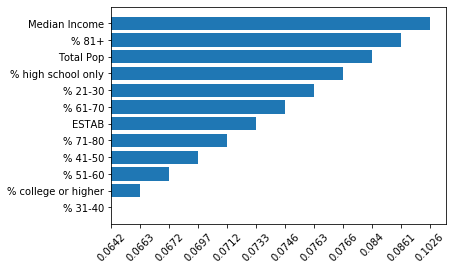

In [274]:
plt.barh(feature_importance[::-1,1], feature_importance[::-1,0])
plt.xticks(rotation=45)

In [ ]:
# train random forst model
random_forst_clf = LogisticRegression()
random_forst_clf.fit(X_train, y_train)
# print(random_forst_clf.predict(X_test) == y_test)
accuracy(random_forst_clf.predict(X_test), y_test)

In [162]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
# print(random_forst_clf.predict(X_test) == y_test)
accuracy(xgb.predict(X_test), y_test)

0.5699658703071673

In [163]:
xgb.predict(X_test)

array([11., 10., 11., 11., 11.,  0., 11., 11., 11., 11., 11., 11., 11.,
       11., 11.,  0., 11., 11.,  0., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 10., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 10., 11., 10., 11., 11., 11.,
       11., 11., 11.,  0., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11.,  0., 11.,  0., 11., 11., 11., 10., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 10., 11., 11., 11.,
       11., 11., 11.,  0., 11., 11., 11.,  0.,  0., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11.,  0., 10., 11.,  0., 11., 11., 11.,
        4., 11., 11., 10., 11., 10.,  0., 11., 11., 11., 11., 11.,  0.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 10., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 10., 11

In [444]:
X.shape

(2926, 13)

## Deep Learning Approach with PyTorch

In [742]:
input_size = 13
hidden_size = 16
num_classes = 12 
num_epochs = 100
learning_rate = 0.001
BATCH_SIZE_1 = 101 #train_loader as it has 404 observations
BATCH_SIZE_2 = 51 #test_loader as it has 102 observations
device = torch.device('cuda:0')

In [743]:
## prepare training data
mX_train, mX_test, my_train, my_test = train_test_split(multi_X, multi_y, test_size = 0.2, random_state=42)

In [744]:
mX_train.shape

(2340, 13)

In [745]:
train_tensor = data_utils.TensorDataset(torch.from_numpy(np.array(mX_train)).float(), torch.from_numpy(np.array(my_train)).float())
test_tensor = data_utils.TensorDataset(torch.from_numpy(np.array(mX_test)).float(), torch.from_numpy(np.array(my_test)).float())
train_loader = DataLoader(dataset = train_tensor, batch_size = 16, shuffle=True)
test_loader = DataLoader(dataset = test_tensor, batch_size = 16, shuffle=True)

In [746]:
for i in train_loader:
    print(i[1].numpy().shape)

(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(16, 12)
(

In [747]:
import torch.nn.functional
## model structure
class LinearModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LinearModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()
                           
    def get_weights(self):
        return self.weight
    
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = F.sigmoid(self.fc3(out)) #sigmoid as we use BCELoss
        return out

In [748]:
## training
def train(model, device, in_train_loader, optimizer):
    model.train()
    y_true = []
    y_pred = []
    losses = []
    for i in in_train_loader:
        optimizer.zero_grad()
        
        #LOADING THE DATA IN A BATCH
        data, target = i
 
        #MOVING THE TENSORS TO THE CONFIGURED DEVICE
        data, target = data.to(device), target.to(device)
       
        #FORWARD PASS
        output = model(data.float())
        loss = criterion(output, target) 
        
        #BACKWARD AND OPTIMIZE
        loss.backward()
        optimizer.step()
        
        losses.append(loss.data.cpu().numpy())
        # PREDICTIONS 
        pred = np.round(output.detach().cpu())
        target = np.round(target.detach().cpu())
        y_pred.extend(pred.tolist())
        y_true.extend(target.tolist())
    print("accuracy on train set is" , np.sum(np.array(y_pred) == np.array(y_true))/(np.array(y_pred).shape[0] * np.array(y_pred).shape[1]))
    print("***********************************************************")
    print("loss on train set is" , np.average(np.array(losses)))
    print("***********************************************************")

In [749]:
#TESTING THE MODEL
def test(model, device, test_loader):
    #model in eval mode skips Dropout etc
    model.eval()
    y_true = []
    y_pred = [] 
    # set the requires_grad flag to false as we are in the test mode
    with torch.no_grad():
        for i in test_loader:
            
            #LOAD THE DATA IN A BATCH
            data,target = i
            
            # moving the tensors to the configured device
            data, target = data.to(device), target.to(device)
            
            # the model on the data
            output = model(data.float())
                       
            #PREDICTIONS
            pred = np.round(output.cpu())
            target = target.float()
            y_true.extend(target.tolist()) 
            y_pred.extend(pred.tolist())
            
    print("accuracy on test set is" , np.sum(np.array(y_pred) == np.array(y_true))/(np.array(y_pred).shape[0] * np.array(y_pred).shape[1]))
    print("***********************************************************")

In [750]:
# Creating model and setting loss and optimizer.

model = LinearModel(input_size, hidden_size, num_classes).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [751]:
for epoch in range(num_epochs):
    train(model, device, train_loader, optimizer)
    test(model, device, test_loader)

accuracy on train set is 0.6832621082621083
***********************************************************
loss on train set is 0.7425424
***********************************************************
accuracy on test set is 0.6946814562002275
***********************************************************
accuracy on train set is 0.7197293447293447
***********************************************************
loss on train set is 0.71782297
***********************************************************
accuracy on test set is 0.7255403868031854
***********************************************************
accuracy on train set is 0.7449786324786325
***********************************************************
loss on train set is 0.70000213
***********************************************************
accuracy on test set is 0.7406143344709898
***********************************************************
accuracy on train set is 0.7516381766381767
***********************************************************


KeyboardInterrupt: 

In [ ]:
type(mX_train)

In [757]:
datasheet = X
zip_info = pd.read_csv('our_data/uszips.csv')
def zip_to_county_fip(zip_num):
    result = zip_info[zip_info['zip'] == zip_num]['county_fips'].tolist()
    if (len(result)):
        return result[0]
    else:
        return float('nan')

In [774]:
def top_choice_given_zip(zip_num):
    return name2idx[random_forst_clf.predict(np.array(datasheet[datasheet['fips'] == zip_to_county_fip(6243)].values).reshape(1,13))[0]]

In [775]:
top_choice_given_zip(6001)

'Building material and garden equipment and supplies dealers'